# ACS data catalogue demo
### "nesting" two CCAM `intake-esm` sub-catalogues into one `intake-dataframe` root catalogue

Date: 19 May 2023

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

### 116TB of CCAM data across two "runs", aka two "sources" each with their own `intake-esm` catalogue.  We have many 10's of thousands of `netcdf` file paths in total.

#### ccam_noresm2-mm_historical_aus-10i_12km = 50TB <br> ccam_noresm2-mm_ssp126_aus-10i_12km = 66TB

### Compute using "small" ARE cluster at NCI ( 2 CPU & 9GB RAM )
cost = 2.5 SUs per hour = 10 cents per hour

#### required packages

In [1]:
import intake
import xarray as xr
from matplotlib import pyplot as plt

#### start a local Dask client

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 2
Total threads: 2,Total memory: 9.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36375,Workers: 2
Dashboard: /proxy/8787/status,Total threads: 2
Started: Just now,Total memory: 9.00 GiB
Comm: tcp://127.0.0.1:44171,Total threads: 1
Dashboard: /proxy/41015/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:45401,


#### ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### read paths from config file

#### [ you will need to specifiy your correct path for the `data-catalogue/config.ini` file ]

In [4]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
#########
#### you will need to specifiy your correct path the the `data-catalogue/config.ini` file 
#########
config.read('./code/ACS/data-catalogue/config.ini')

# Get the value of a variable
catalogue_path = config.get('paths', 'catalogue_path')

In [5]:
catalogue_path

'/g/data/v14/tm4888/code/ACS/data-catalogue/catalogues/'

### open the root ACS intake dataframe catalogue

In [6]:
df_cat = intake.open_df_catalog(
    path=catalogue_path+'root_df_catalog.csv',
    columns_with_iterables=["variable"],
)

In [7]:
df_cat

,model,variable
name,,
ccam_noresm2-mm_historical_aus-10i_12km,{ccam_noresm2-mm_historical_aus-10i_12km},"{hus400, cll, zg700, tas, ua20, zg300, wa500, va300m, prw, mrfsol, mrros, ua70, va10, ua600, hus70, rldscs, zg50, ta300, wa200, zg150, zg850, clt, sfcWindmax, wsgsmax, clivi, zg250, wa925, ta200, ..."
ccam_noresm2-mm_ssp126_aus-10i_12km,{ccam_noresm2-mm_ssp126_aus-10i_12km},"{hus400, cll, zg700, tas, ua20, zg300, wa500, va300m, prw, mrfsol, mrros, ua70, va10, ua600, hus70, rldscs, zg50, ta300, wa200, zg150, zg850, clt, sfcWindmax, wsgsmax, clivi, zg250, wa925, ta200, ..."


### what are the unique variables? (There are many - 176)

In [8]:
df_cat.unique()['variable']

['hus400',
 'cll',
 'zg700',
 'tas',
 'ua20',
 'zg300',
 'wa500',
 'va300m',
 'prw',
 'mrfsol',
 'mrros',
 'ua70',
 'va10',
 'ua600',
 'hus70',
 'rldscs',
 'zg50',
 'ta300',
 'wa200',
 'zg150',
 'zg850',
 'clt',
 'sfcWindmax',
 'wsgsmax',
 'clivi',
 'zg250',
 'wa925',
 'ta200',
 'wa50',
 'ua300',
 'hfls',
 'ua50m',
 'wa10',
 'ua250m',
 'zg100',
 'va400',
 'tauv',
 'mrsos',
 'psl',
 'rlut',
 'rlds',
 'rsdscs',
 'va200',
 'ua400',
 'ua100m',
 'CIN',
 'hurs',
 'rsuscs',
 'wa850',
 'va500',
 'hus700',
 'wa300',
 'hus10',
 'snc',
 'hus150',
 'rsus',
 'va30',
 'va1000',
 'rsutcs',
 'ua50',
 'ta500',
 'va300',
 'va250m',
 'wa250',
 'hus100',
 'zg20',
 'rlutcs',
 'rsdsdir',
 'rsut',
 'sund',
 'rsds',
 'clm',
 'ua150',
 'va200m',
 'ua30',
 'ta20',
 'va50m',
 'ta600',
 'ta10',
 'rlus',
 'snd',
 'hus500',
 'va50',
 'hus50',
 'va150m',
 'mrsol',
 'tauu',
 'wa100',
 'va20',
 'ua700',
 'zg200',
 'ua500',
 'hus30',
 'va70',
 'snm',
 'va925',
 'ta70',
 'ua250',
 'hus600',
 'zmla',
 'clh',
 'prc',
 'ua

#### let's find all variables with "tas" via `regex` - finding variables that might be related to surface air temperature

In [9]:
tas_search = df_cat.search(variable=".*tas.*")
tas_search

,model,variable
name,,
ccam_noresm2-mm_historical_aus-10i_12km,{ccam_noresm2-mm_historical_aus-10i_12km},"{tasmax, tas, tasmin}"
ccam_noresm2-mm_ssp126_aus-10i_12km,{ccam_noresm2-mm_ssp126_aus-10i_12km},"{tasmax, tas, tasmin}"


#### we can see above that both an historical and ssp126 run of ccam_noresm2-mm contain the same three "tas*" variables
### Let's now include "historical" in the search and narrow to just "tas" variable

In [10]:
tas_hist_search = df_cat.search(variable="tas",model="ccam_noresm2-mm_historical_aus-10i_12km")
tas_hist_search

,model,variable
name,,
ccam_noresm2-mm_historical_aus-10i_12km,{ccam_noresm2-mm_historical_aus-10i_12km},{tas}


#### we can see that this search points to a single source `intake-esm` catalogue

In [11]:
tas_hist_search.df

,model,variable,name,yaml
0,ccam_noresm2-mm_historical_aus-10i_12km,[tas],ccam_noresm2-mm_historical_aus-10i_12km,sources:\n ccam_noresm2-mm_historical_aus-10i_12km:\n args:\n obj: /g/data/v14/tm4888/code/ACS/data-catalogue/catalogues/ccam_noresm2-mm_historical_aus-10i_12km.json\n description: ''\...


## now load the `intake` source for this search

In [12]:
tas_hist_source = tas_hist_search.to_source(pass_query=True)
tas_hist_source

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/v14/tm4888/code/ACS/data-catalogue/catalogues/file:///g/data/v14/tm4888/code/ACS/data-catalogue/catalogues/ccam_noresm2-mm_historical_aus-10i_12km.csv'

2023-05-22 15:00:18,471 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:18,475 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:18,494 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:18,597 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:18,599 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:18,900 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:18,901 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:19,904 - distributed.nanny - WARNING - Restarting worker
2023-05-22 15:00:19,908 - distributed.nanny - WARNING - Restarting worker


#### we can now see the one "tas" variable, 3 time periods, and a total of 192 remaining `netcdf` file paths

### let's use `keys_info()` for another view
#### we can see that there are 3 available periods, "1hr","day", & "mon"

In [13]:
tas_hist_source.keys_info()

,domain,host_GCM,run_type,host_ensemble,downscale_model,downscale_version,period
key,,,,,,,
AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.1hr,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,1hr
AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.day,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,day
AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.mon,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon


### select only monthly data

In [14]:
monthly_tas_hist = tas_hist_source.search(period='mon')
monthly_tas_hist

,unique
variable,1
domain,1
host_GCM,1
run_type,1
host_ensemble,1
downscale_model,1
downscale_version,1
period,1
time_period,1
path,64


### we are now left with the 64 `netcdf` paths that meet our search filter

In [15]:
monthly_tas_hist.df

,variable,domain,host_GCM,run_type,host_ensemble,downscale_model,downscale_version,period,time_period,path
0,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
1,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
2,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
3,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
4,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
5,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
6,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
7,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
8,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
9,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...


### we can load catalogue entries into a dictionary of `xarray` datasets

In [16]:
DS_dict = monthly_tas_hist.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'domain.host_GCM.run_type.host_ensemble.downscale_model.downscale_version.period'


### but in this care there is only one

In [17]:
DS_dict

{'AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.mon': <xarray.Dataset>
 Dimensions:   (time: 768, lat: 611, lon: 928, bnds: 2)
 Coordinates:
   * time      (time) object 1951-01-15 12:00:00 ... 2014-12-15 12:00:00
     lat_bnds  (lat, bnds) float32 dask.array<chunksize=(611, 2), meta=np.ndarray>
     lon_bnds  (lon, bnds) float32 dask.array<chunksize=(928, 2), meta=np.ndarray>
   * lon       (lon) float64 89.3 89.4 89.5 89.6 89.7 ... 181.7 181.8 181.9 182.0
   * lat       (lat) float64 -52.3 -52.2 -52.1 -52.0 -51.9 ... 8.4 8.5 8.6 8.7
 Dimensions without coordinates: bnds
 Data variables:
     tas       (time, lat, lon) float32 dask.array<chunksize=(12, 611, 928), meta=np.ndarray>
 Attributes: (12/29)
     axiom_version:                       0.1.0
     axiom_schemas_version:               0.1.0
     axiom_schema:                        CORDEX
     contact:                             Marcus Thatcher (Marcus.Thatcher@csi...
     Conventions:                         CF-1

### so we can load this simple case as a single `xarray` dataset

In [18]:
DS = monthly_tas_hist.to_dask()

In [19]:
DS

<xarray.Dataset>
Dimensions:   (time: 768, lat: 611, lon: 928, bnds: 2)
Coordinates:
  * time      (time) object 1951-01-15 12:00:00 ... 2014-12-15 12:00:00
    lat_bnds  (lat, bnds) float32 dask.array<chunksize=(611, 2), meta=np.ndarray>
    lon_bnds  (lon, bnds) float32 dask.array<chunksize=(928, 2), meta=np.ndarray>
  * lon       (lon) float64 89.3 89.4 89.5 89.6 89.7 ... 181.7 181.8 181.9 182.0
  * lat       (lat) float64 -52.3 -52.2 -52.1 -52.0 -51.9 ... 8.4 8.5 8.6 8.7
Dimensions without coordinates: bnds
Data variables:
    tas       (time, lat, lon) float32 dask.array<chunksize=(12, 611, 928), meta=np.ndarray>
Attributes: (12/29)
    axiom_version:                       0.1.0
    axiom_schemas_version:               0.1.0
    axiom_schema:                        CORDEX
    contact:                             Marcus Thatcher (Marcus.Thatcher@csi...
    Conventions:                         CF-1.7
    CORDEX_domain:                       AUS-10i
    ...                                  ...
    intake_esm_attrs:downscale_model:    CSIRO-CCAM-2203
    intake_esm_attrs:downscale_version:  v1
    intake_esm_attrs:period:             mon
    intake_esm_attrs:time_period:        monthly
    intake_esm_attrs:_data_format_:      netcdf
    intake_esm_dataset_key:              AUS-10i.NCC-NorESM2-MM.historical.r1...

## this selection is reduced to only 1.62 GB
### so lets load into memory for quick calculations

#### NOTE: all these loads rely on `xarray` `openMF_dataset` which uses `netCDF4` which wraps `netcdf-c`.  Errors were introduced with `netcdf4` 1.6.1.  A 1.6.4 fix is underway, maybe? See: 
https://forum.access-hive.org.au/t/netcdf-not-a-valid-id-errors/389
#### so we've downgraded `netcdf4` to `1.6.0` in this `ACS-demo` environment

In [20]:
%%time
data = DS.compute()

CPU times: user 803 ms, sys: 1.9 s, total: 2.7 s
Wall time: 8.43 s


In [21]:
data

<xarray.Dataset>
Dimensions:   (time: 768, lat: 611, lon: 928, bnds: 2)
Coordinates:
  * time      (time) object 1951-01-15 12:00:00 ... 2014-12-15 12:00:00
    lat_bnds  (lat, bnds) float32 -52.35 -52.25 -52.25 -52.15 ... 8.65 8.65 8.75
    lon_bnds  (lon, bnds) float32 89.25 89.35 89.35 89.45 ... 181.9 181.9 182.1
  * lon       (lon) float64 89.3 89.4 89.5 89.6 89.7 ... 181.7 181.8 181.9 182.0
  * lat       (lat) float64 -52.3 -52.2 -52.1 -52.0 -51.9 ... 8.4 8.5 8.6 8.7
Dimensions without coordinates: bnds
Data variables:
    tas       (time, lat, lon) float32 279.5 279.5 279.5 ... 302.1 302.1 302.1
Attributes: (12/29)
    axiom_version:                       0.1.0
    axiom_schemas_version:               0.1.0
    axiom_schema:                        CORDEX
    contact:                             Marcus Thatcher (Marcus.Thatcher@csi...
    Conventions:                         CF-1.7
    CORDEX_domain:                       AUS-10i
    ...                                  ...
    intake_esm_attrs:downscale_model:    CSIRO-CCAM-2203
    intake_esm_attrs:downscale_version:  v1
    intake_esm_attrs:period:             mon
    intake_esm_attrs:time_period:        monthly
    intake_esm_attrs:_data_format_:      netcdf
    intake_esm_dataset_key:              AUS-10i.NCC-NorESM2-MM.historical.r1...

#### convert K temperatures to C

In [22]:
tas_C = data.tas - 273.15

## some basic calculations & plots using DASK on our small client

##### Time mean TAS

In [23]:
%%time
tas_C_mean = tas_C.mean('time')                    

CPU times: user 1.16 s, sys: 992 ms, total: 2.15 s
Wall time: 2.06 s


Text(0.5, 1.0, 'Time mean TAS\n Historical run\n NCC-NorESM2-MM CCAM')

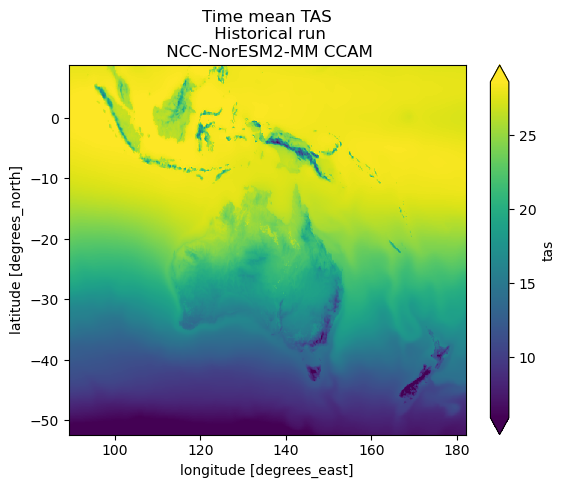

In [24]:
tas_C_mean.plot(robust=True)
plt.title('Time mean TAS\n Historical run\n NCC-NorESM2-MM CCAM')

### seasonal climatology

In [25]:
%%time
season_tas_C = tas_C.groupby('time.season').mean('time').compute()

CPU times: user 1.48 s, sys: 1.16 s, total: 2.65 s
Wall time: 2.54 s


Text(0.5, 1.0, 'DJF season TAS\n Historical run\n NCC-NorESM2-MM CCAM')

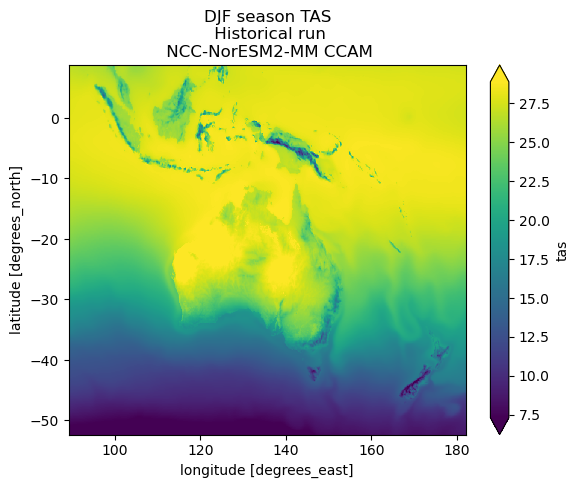

In [26]:
season_tas_C.sel(season='DJF').plot(robust=True)
plt.title('DJF season TAS\n Historical run\n NCC-NorESM2-MM CCAM')

#### departure of DJF from mean surface air temperature

In [27]:
diff = season_tas_C.sel(season='DJF') - tas_C_mean

Text(0.5, 1.0, 'TAS // DJF season departure from mean \n Historical run\n NCC-NorESM2-MM CCAM')

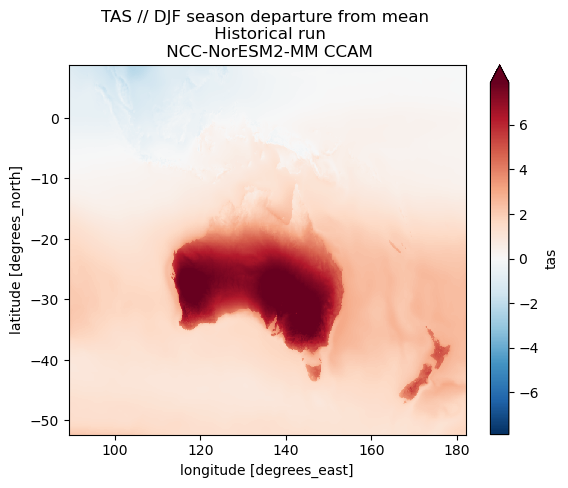

In [28]:
diff.plot(robust=True)
plt.title('TAS // DJF season departure from mean \n Historical run\n NCC-NorESM2-MM CCAM')

# TLDR

#### make a plot of seasonal DJF climatology for:
- NCC-NorESM2-MM CCAM
- Historical run
- Monthly surface air temperature

#### 9 lines of code and less than a minute of walltime on a small cluster

CPU times: user 1.95 s, sys: 121 ms, total: 2.07 s
Wall time: 9 s


Text(0.5, 1.0, 'DJF season TAS\n Historical run\n NCC-NorESM2-MM CCAM')

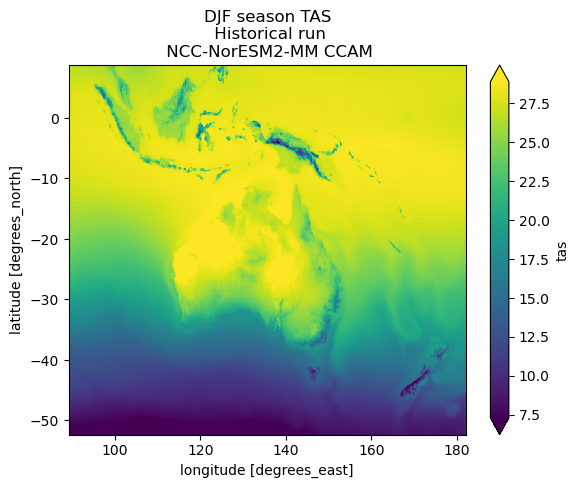

In [29]:
%%time
#load root catalogue
df_cat = intake.open_df_catalog(
    path=catalogue_path+'root_df_catalog.csv',
    columns_with_iterables=["variable"],
)
#find data source and filter data source
tas_hist_search = df_cat.search(variable="tas",model="ccam_noresm2-mm_historical_aus-10i_12km")
tas_hist_source = tas_hist_search.to_source(pass_query=True)
monthly_tas_hist = tas_hist_source.search(period='mon')
# load data lazily with Dask
DS = monthly_tas_hist.to_dask()
# convert to C from K & calculate seasonal clim
tas_C = DS.tas - 273.15
season_tas_C = tas_C.groupby('time.season').mean('time')
#plot
season_tas_C.sel(season='DJF').plot(robust=True)
plt.title('DJF season TAS\n Historical run\n NCC-NorESM2-MM CCAM')

# The End

In [30]:
client.shutdown()